In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('zomato_ml.csv')
df

,Cuisines,Rating_text,Rating,City_id,Country_id,Average_cost
0,American Asian NorthIndian,VeryGood,4.3,1,1,1600
1,Thai European Mexican NorthIndian Chinese ...,Excellent,4.5,1,1,1500
2,Cafe Italian Chinese,VeryGood,4.4,1,1,850
3,Italian,VeryGood,4.1,1,1,1850
4,NorthIndian Italian Asian American,VeryGood,4.4,1,1,1600
...,...,...,...,...,...,...
9580,Mexican,Good,3.6,667,216,0
9581,American Seafood Steak,Good,3.6,667,216,40
9582,American BBQ Steak,Good,3.5,667,216,45
9583,Asian Thai,Good,3.6,667,216,10


In [2]:
df['Cuisines'].unique()

array(['  American  Asian NorthIndian',
       'Thai  European  Mexican  NorthIndian  Chinese Cafe',
       'Cafe Italian   Chinese', ..., ' Indian  Persian',
       ' Desserts  Thai', ' American  Greek'], dtype=object)

In [3]:
df['Cuisines'] = df['Cuisines'].str.split(' ')
df = df.explode('Cuisines').reset_index(drop=True)

In [4]:
df

,Cuisines,Rating_text,Rating,City_id,Country_id,Average_cost
0,,VeryGood,4.3,1,1,1600
1,,VeryGood,4.3,1,1,1600
2,American,VeryGood,4.3,1,1,1600
3,,VeryGood,4.3,1,1,1600
4,Asian,VeryGood,4.3,1,1,1600
...,...,...,...,...,...,...
35983,,Good,3.6,667,216,0
35984,Pizza,Good,3.6,667,216,0
35985,,Good,3.6,667,216,0
35986,Bar,Good,3.6,667,216,0


In [5]:
df['Cuisines'].unique()

array(['', 'American', 'Asian', 'NorthIndian', 'Thai', 'European',
       'Mexican', 'Chinese', 'Cafe', 'Italian', 'FingerFood', 'Indian',
       'Mughlai', 'Mediterranean', 'FastFood', 'SouthIndian', 'Middle',
       'Eastern', 'Bengali', 'Tex-Mex', 'Biryani', 'Desserts', 'Seafood',
       'StreetFood', 'Tea', 'Bakery', 'Burger', 'Pizza', 'HealthyFood',
       'Salad', 'Beverages', 'Japanese', 'British', nan, 'Spanish',
       'Greek', 'Charcoal', 'Grill', 'Indonesian', 'NorthEastern',
       'Burmese', 'German', 'Andhra', 'Chettinad', 'Goan', 'Hyderabadi',
       'Awadhi', 'Arabian', 'Lebanese', 'Lucknowi', 'IceCream', 'Kerala',
       'Rajasthani', 'Armenian', 'Sandwich', 'Malaysian', 'French',
       'Maharashtrian', 'Malwani', 'Portuguese', 'African', 'Juices',
       'Tibetan', 'Mithai', 'BBQ', 'Cajun', 'Vietnamese', 'Steak',
       'Parsi', 'Mangalorean', 'Gujarati', 'Korean', 'International',
       'Fusion', 'Turkish', 'Singaporean', 'Malay', 'Western',
       'Australian', 'C

In [6]:
df.shape

(35988, 6)

In [7]:
df = df[~df['Cuisines'].isin(['', ' nan','Sri','South','and','Only','New','Soul'])]

In [8]:
df['Cuisines'].unique()

array(['American', 'Asian', 'NorthIndian', 'Thai', 'European', 'Mexican',
       'Chinese', 'Cafe', 'Italian', 'FingerFood', 'Indian', 'Mughlai',
       'Mediterranean', 'FastFood', 'SouthIndian', 'Middle', 'Eastern',
       'Bengali', 'Tex-Mex', 'Biryani', 'Desserts', 'Seafood',
       'StreetFood', 'Tea', 'Bakery', 'Burger', 'Pizza', 'HealthyFood',
       'Salad', 'Beverages', 'Japanese', 'British', nan, 'Spanish',
       'Greek', 'Charcoal', 'Grill', 'Indonesian', 'NorthEastern',
       'Burmese', 'German', 'Andhra', 'Chettinad', 'Goan', 'Hyderabadi',
       'Awadhi', 'Arabian', 'Lebanese', 'Lucknowi', 'IceCream', 'Kerala',
       'Rajasthani', 'Armenian', 'Sandwich', 'Malaysian', 'French',
       'Maharashtrian', 'Malwani', 'Portuguese', 'African', 'Juices',
       'Tibetan', 'Mithai', 'BBQ', 'Cajun', 'Vietnamese', 'Steak',
       'Parsi', 'Mangalorean', 'Gujarati', 'Korean', 'International',
       'Fusion', 'Turkish', 'Singaporean', 'Malay', 'Western',
       'Australian', 'Canto

In [9]:
df.shape

(19173, 6)

In [10]:
df.dtypes

Cuisines         object
Rating_text      object
Rating          float64
City_id           int64
Country_id        int64
Average_cost      int64
dtype: object

In [11]:
df['Rating_text'].unique()

array(['VeryGood', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [12]:
df['Rating'].unique()


array([4.3, 4.5, 4.4, 4.1, 4.6, 2.4, 4.2, 3.7, 3.9, 4.8, 4.9, 4. , 3.5,
       3.6, 4.7, 3.8, 3.4, 2.6, 3.3, 3.1, 3. , 3.2, 2.2, 2.5, 0. , 2.8,
       2.3, 2.9, 2.7, 2.1, 1.9, 2. , 1.8])

In [13]:
df.loc[(df['Rating'] >= 0) & (df['Rating'] < 1), 'Rating'] = 1
df.loc[(df['Rating'] >= 1.1) & (df['Rating'] < 2), 'Rating'] = 2
df.loc[(df['Rating'] >= 2.1) & (df['Rating'] < 3), 'Rating'] = 3
df.loc[(df['Rating'] >= 3.1) & (df['Rating'] < 4), 'Rating'] = 4
df.loc[(df['Rating'] >= 4.1) & (df['Rating'] < 5), 'Rating'] = 5
    

In [14]:
df['Rating'].unique()

array([5., 3., 4., 1., 2.])

In [15]:
df['City_id'].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    16,    20,    21,    22,
          23,    24,    25,    26,    27,    28,    29,    30,    31,
          32,    33,    34,    35,    36,    37,    38,    39,    40,
          51,    52,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,  3600,  8351,  2249,  2575,
        1556,  1364,  1563,  7598,  1342,  3418, 10358,  8956, 10261,
        3977,  1770,  8410,  7634,  1902,  6321, 11052,  2242,  1730,
        2218,  2309,  8327,  1695,  1565, 10238,  1345,  2824, 11071,
        1800,  1424,  3525,  1353,  2051,   943,  2617,  2576,  8397,
        1924,  2430,   601,   604,   607,   610,   613,   616,   619,
         622,   625,   628,   634,   637,   640,   643,   646,   649,
         652,   655,   658,   664,   667], dtype=int64)

In [16]:
df['Country_id'].unique()

array([  1, 214, 184, 191, 208, 215, 166, 162, 189,  30, 148,  17,  94,
        37, 216,  14], dtype=int64)

In [17]:
df.dtypes

Cuisines         object
Rating_text      object
Rating          float64
City_id           int64
Country_id        int64
Average_cost      int64
dtype: object

In [18]:
df

,Cuisines,Rating_text,Rating,City_id,Country_id,Average_cost
2,American,VeryGood,5.0,1,1,1600
4,Asian,VeryGood,5.0,1,1,1600
5,NorthIndian,VeryGood,5.0,1,1,1600
6,Thai,Excellent,5.0,1,1,1500
8,European,Excellent,5.0,1,1,1500
...,...,...,...,...,...,...
35981,Asian,Good,4.0,667,216,10
35982,Thai,Good,4.0,667,216,10
35984,Pizza,Good,4.0,667,216,0
35986,Bar,Good,4.0,667,216,0


In [19]:
df.isna().sum()

Cuisines        6
Rating_text     0
Rating          0
City_id         0
Country_id      0
Average_cost    0
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.isna().sum()

Cuisines        0
Rating_text     0
Rating          0
City_id         0
Country_id      0
Average_cost    0
dtype: int64

In [22]:
df.duplicated().sum()

13124

In [129]:
duplicates = df[df.duplicated()]
print(duplicates)

          Cuisines Rating_text  Rating  City_id  Country_id  Average_cost
23     NorthIndian    VeryGood     5.0        1           1          1600
26           Asian    VeryGood     5.0        1           1          1600
27        American    VeryGood     5.0        1           1          1600
53          Indian    VeryGood     5.0        1           1          2200
90        American    VeryGood     5.0        1           1          1600
...            ...         ...     ...      ...         ...           ...
35955     Sandwich        Good     4.0      667         216            10
35961       Burger        Good     4.0      667         216            10
35963        Pizza        Good     4.0      667         216            10
35965     Sandwich        Good     4.0      667         216            10
35969     American        Good     4.0      667         216            40

[13124 rows x 6 columns]


In [23]:
# Drop duplicate rows
df1 = df.drop_duplicates()

# Reset index (drop=True avoids old index being added as a column)
df1 = df1.reset_index(drop=True)

In [24]:
df1

,Cuisines,Rating_text,Rating,City_id,Country_id,Average_cost
0,American,VeryGood,5.0,1,1,1600
1,Asian,VeryGood,5.0,1,1,1600
2,NorthIndian,VeryGood,5.0,1,1,1600
3,Thai,Excellent,5.0,1,1,1500
4,European,Excellent,5.0,1,1,1500
...,...,...,...,...,...,...
6038,Asian,Good,4.0,667,216,10
6039,Thai,Good,4.0,667,216,10
6040,Pizza,Good,4.0,667,216,0
6041,Bar,Good,4.0,667,216,0


In [25]:
df1['Cuisines'].unique()

array(['American', 'Asian', 'NorthIndian', 'Thai', 'European', 'Mexican',
       'Chinese', 'Cafe', 'Italian', 'FingerFood', 'Indian', 'Mughlai',
       'Mediterranean', 'FastFood', 'SouthIndian', 'Middle', 'Eastern',
       'Bengali', 'Tex-Mex', 'Biryani', 'Desserts', 'Seafood',
       'StreetFood', 'Tea', 'Bakery', 'Burger', 'Pizza', 'HealthyFood',
       'Salad', 'Beverages', 'Japanese', 'British', 'Spanish', 'Greek',
       'Charcoal', 'Grill', 'Indonesian', 'NorthEastern', 'Burmese',
       'German', 'Andhra', 'Chettinad', 'Goan', 'Hyderabadi', 'Awadhi',
       'Arabian', 'Lebanese', 'Lucknowi', 'IceCream', 'Kerala',
       'Rajasthani', 'Armenian', 'Sandwich', 'Malaysian', 'French',
       'Maharashtrian', 'Malwani', 'Portuguese', 'African', 'Juices',
       'Tibetan', 'Mithai', 'BBQ', 'Cajun', 'Vietnamese', 'Steak',
       'Parsi', 'Mangalorean', 'Gujarati', 'Korean', 'International',
       'Fusion', 'Turkish', 'Singaporean', 'Malay', 'Western',
       'Australian', 'Cantonese'

In [26]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

rate_text_mapping ={'Not rated':1, 'Poor':2, 'Average':3, 'Good':4, 'VeryGood':5, 'Excellent':6}
# alter the column with the mapped columns
df1['Rating_text'] = df1['Rating_text'].map(rate_text_mapping)

#list unique streetnames
cuisines = df1['Cuisines'].unique()
# map the street to provide input to ML model
cuisines_mapping = {street: idx + 1 for idx, street in enumerate(cuisines)}


In [135]:
cuisines_mapping 

{'American': 1,
 'Asian': 2,
 'NorthIndian': 3,
 'Thai': 4,
 'European': 5,
 'Mexican': 6,
 'Chinese': 7,
 'Cafe': 8,
 'Italian': 9,
 'FingerFood': 10,
 'Indian': 11,
 'Mughlai': 12,
 'Mediterranean': 13,
 'FastFood': 14,
 'SouthIndian': 15,
 'Middle': 16,
 'Eastern': 17,
 'Bengali': 18,
 'Tex-Mex': 19,
 'Biryani': 20,
 'Desserts': 21,
 'Seafood': 22,
 'StreetFood': 23,
 'Tea': 24,
 'Bakery': 25,
 'Burger': 26,
 'Pizza': 27,
 'HealthyFood': 28,
 'Salad': 29,
 'Beverages': 30,
 'Japanese': 31,
 'British': 32,
 'Spanish': 33,
 'Greek': 34,
 'Charcoal': 35,
 'Grill': 36,
 'Indonesian': 37,
 'NorthEastern': 38,
 'Burmese': 39,
 'German': 40,
 'Andhra': 41,
 'Chettinad': 42,
 'Goan': 43,
 'Hyderabadi': 44,
 'Awadhi': 45,
 'Arabian': 46,
 'Lebanese': 47,
 'Lucknowi': 48,
 'IceCream': 49,
 'Kerala': 50,
 'Rajasthani': 51,
 'Armenian': 52,
 'Sandwich': 53,
 'Malaysian': 54,
 'French': 55,
 'Maharashtrian': 56,
 'Malwani': 57,
 'Portuguese': 58,
 'African': 59,
 'Juices': 60,
 'Tibetan': 61,
 '

In [28]:
df1['Cuisines'] = df1['Cuisines'].map(cuisines_mapping)

In [29]:
df1

,Cuisines,Rating_text,Rating,City_id,Country_id,Average_cost
0,1,5,5.0,1,1,1600
1,2,5,5.0,1,1,1600
2,3,5,5.0,1,1,1600
3,4,6,5.0,1,1,1500
4,5,6,5.0,1,1,1500
...,...,...,...,...,...,...
6038,2,4,4.0,667,216,10
6039,4,4,4.0,667,216,10
6040,27,4,4.0,667,216,0
6041,86,4,4.0,667,216,0


In [30]:
df1.dtypes

Cuisines          int64
Rating_text       int64
Rating          float64
City_id           int64
Country_id        int64
Average_cost      int64
dtype: object

In [ ]:
X = df.iloc[:,:5]
y = df.iloc[:,5]

In [41]:
# 📦 Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Step 1: Load your dataset (Example)


# Let's assume 'target' is your target variable
X = df1.drop('Average_cost', axis=1)
y = df1['Average_cost']

# 🔤 Step 2: Handle categorical variables using One-Hot Encoding
X = pd.get_dummies(X)

# ✂️ Step 3: Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 🌲 Step 4: Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)

# 🔮 Step 5: Predict on test data
y_pred = rf.predict(X_test)

# 📈 Step 6: Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"✅ MSE: {mse:.2f}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")


✅ MSE: 448268613.44
✅ RMSE: 21172.35
✅ R² Score: 0.65


In [32]:
y_pred = rf.predict(X_test)

# 6. Show predictions vs actuals
predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions_df.head(10))

   Actual    Predicted
0     550  1075.025873
1      70    70.791667
2    1100   531.309524
3     700   947.986194
4    1900  2017.583974
5    1500  1015.845238
6     200   200.000000
7     300   391.550000
8     250   374.333333
9    1100  1231.857143


C:\Users\Raj\AppData\Local\Temp\ipykernel_16364\2673169349.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\Raj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


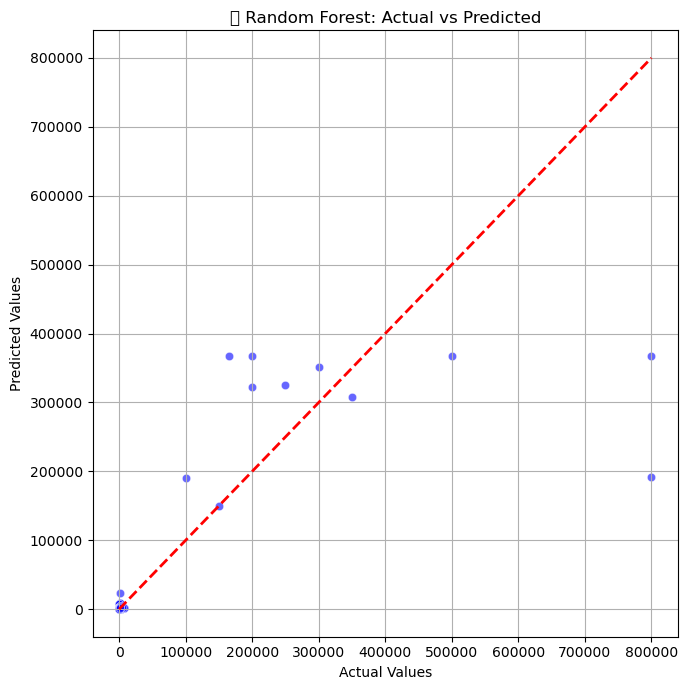

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are already defined for Random Forest
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("📊 Random Forest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pickle



# ✅ Save the model
with open('zomato_ML.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("✅ Trained model saved as 'zomato_ML.pkl'")

✅ Trained model saved as 'zomato_ML.pkl'
